In [2]:
# Let’s start by importing some libraries.
%matplotlib inline
import numpy as np
import pandas as pd
import math
from math import sqrt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
#importar la data como DataFrame
data = pd.read_csv(r'C:oct2018_abril2019_CIES_v1.csv')
# Mostar tabla de datos
print("_____ Datos medidos _____")
data

_____ Datos medidos _____


,Ta,G,V,Tc
0,25,0,1.46260,23.0
1,26,0,0.98375,23.0
2,26,0,1.50360,23.0
3,26,0,1.11610,24.0
4,26,0,1.13040,24.0
...,...,...,...,...
23314,26,0,0.48847,24.0
23315,26,0,0.49788,23.0
23316,26,0,0.70830,23.0
23317,26,0,0.61277,23.0


In [ ]:
# ver la dimensión de la data
shape = data.shape
print("La data ANTES de filtrar contiene {} filas y {} columnas".format(shape[0],shape[1]))
# filtra datos de G mayores de cero
data = data.drop(data[data['G']<=0].index)
# View the shape of the data frame.
shape = data.shape
print("La data DESPUÉS de filtrar contiene {} filas y {} columnas".format(shape[0],shape[1]))

La data ANTES de filtrar contiene 23319 filas y 4 columnas
La data DESPUÉS de filtrar contiene 11050 filas y 4 columnas


In [ ]:
# Breve resumen estadístico
# View the statistical description of the dataset which includes the total count of each column
# mean of all values, standard deviation, minimum, maximum values, 
# and 25th, 50th, 75th per cent values of the dataset.
print("_____________ Breve resumen estadístico ____________")
data.describe()

_____________ Breve resumen estadístico ____________


,Ta,G,V,Tc
count,11050.000000,11050.000000,11050.000000,11050.000000
mean,29.394932,513.963348,2.496504,41.989683
std,2.670598,327.145723,1.438613,11.756185
min,20.000000,1.000000,0.000000,17.000000
25%,28.000000,208.250000,1.307000,32.000000
50%,30.000000,528.000000,2.370350,44.000000
75%,31.000000,820.000000,3.300575,52.000000
max,35.000000,1247.000000,8.488800,67.000000


In [ ]:
# Asignar variables a las columnas de la data
Ta = data.iloc[:, 0] # Ta
G = data.iloc[:, 1] # G
v = data.iloc[:, 2]  # v
Tc = data.iloc[:, 3]  # Tc

In [ ]:
# calcular regresión lineal múltiple según Numpy
# en Matlab se obtiene Tc = 1.5334*Ta + 0.025523*G - 0.84643*v - 14.089
y = Tc 
x = [Ta, G, v]
x = np.transpose(x) # transpose so input vectors
x = np.c_[x, np.ones(x.shape[0])]  # add bias term
linreg = np.linalg.lstsq(x, y, rcond=None)[0]
# imprimir valores de los coeficientes
print("Valor de Ta: ",linreg[:1])
print("Valor de G:  ",linreg[1:2])
print("Valor de v:  ",linreg[2:3])
print("Valor const: ",linreg[3:4])

Valor de Ta:  [1.5333811]
Valor de G:   [0.02552281]
Valor de v:   [-0.84642831]
Valor const:  [-14.08862541]


In [ ]:
"""
Resultados obtenidos en el Matlab

Linear regression model:
    Tc ~ 1 + Ta + G + v

Estimated Coefficients:
                   Estimate        SE         tStat       pValue   
                   ________    __________    _______    ___________

    (Intercept)     -14.089       0.48408    -29.104    1.7169e-179
    Ta               1.5334      0.018354     83.545              0
    G              0.025523    0.00014976     170.42              0
    v              -0.84643      0.025858    -32.734    2.1796e-224


Number of observations: 11050, Error degrees of freedom: 11046
Root Mean Squared Error: 3.59
R-squared: 0.907,  Adjusted R-Squared: 0.907
F-statistic vs. constant model: 3.57e+04, p-value = 0
"""
y = Tc 
X = [Ta, G, v]

def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

print(reg_m(y, X).summary())

                            OLS Regression Results                            
Dep. Variable:                     Tc   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 3.574e+04
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        15:02:34   Log-Likelihood:                -29811.
No. Observations:               11050   AIC:                         5.963e+04
Df Residuals:                   11046   BIC:                         5.966e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.8464      0.026    -32.734      0.0

In [ ]:
# datos de catálogo STC y NOCT del módulo FV - HEE215MA68
G_noct = 800 # W/m2
T_noct = 45 # °C
Ta_noct = 20 # °C
n_stc = 15.03/100
Beta_stc = -0.34/100
T_stc = 25

# parámetros
Uo = 30.02
U1 = 6.28
UL = (G_noct*0.9)/(T_noct-Ta_noct)

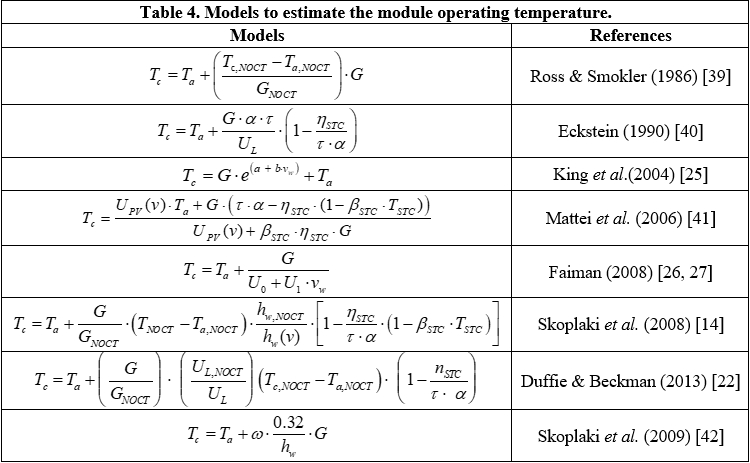

In [ ]:
# Calular Tc según los modelos seleccionados

# 1 Ross & Smokler - (Ross and Smokler, 1986) 
Tc_Std = Ta+(G/G_noct)*(T_noct-Ta_noct)

# 2 Eckstein (1990)
Tc_Eckstein = Ta+(G*0.9/UL)*(1-n_stc/0.9)

# 3 King et al. (2004) 	
Tc_King = Ta+G*np.exp((-3.473-0.0594*v))

# 4 Mattei1
Upv_Mattei1 = 26.6+2.3*v
Tc_Mattei1 = (Upv_Mattei1*Ta+G*(0.81-n_stc*(1-Beta_stc*T_stc)))/(Upv_Mattei1+Beta_stc*n_stc*G)

# 5 Mattei2
Upv_Mattei2 = 24.1 + 2.9*v
Tc_Mattei2 = (Upv_Mattei2*Ta+G*(0.81-n_stc*(1-Beta_stc*T_stc)))/(Upv_Mattei2+Beta_stc*n_stc*G)

# 6 Tc_Faiman
Tc_Faiman = Ta + (G/(Uo + U1*v))

# 7 Skoplaki2 (2008)
hw_Sko2 = 8.91 + 2*v
hw_noct_Sko2 = 8.91 + 2;
Tc_Sko2 = Ta+(G/G_noct)*(T_noct-Ta_noct)*hw_noct_Sko2/hw_Sko2*(1-n_stc/0.9*1-Beta_stc*T_stc)

# 8 Duffie and Beckman (2013)
Tc_Duffie = Ta+(G/G_noct)*(9.5/(5.7 + 3.8*v))*(T_noct-Ta_noct)*(1-n_stc/0.9)

# 10 Skoplaki3 (2008)
Tc_Sko3 = Ta+(0.32/(8.91+2.0*v))*G

In [ ]:
# guardar los resultados en un arreglo y hallar la transpuesta
results_Tc_all = np.transpose([Tc, Tc_Std, Tc_Eckstein, Tc_King, Tc_Mattei1, Tc_Mattei2, 
                               Tc_Faiman, Tc_Sko2, Tc_Duffie, Tc_Sko3])
# definir los nombres de las columnas
columnas = ['Tc_med','Ross&Smokler','Eckstein','King','Mattei1','Mattei2','Faiman',
            'Skoplaki2','Duffie&Beckman','Skoplaki3']# esta lista también podría ser un array de NumPy
# guardo en Frame de Panda con nombre de la columna
results_Tc_all = pd.DataFrame(results_Tc_all, columns = columnas)
#  definir la presición de los resultados a mostrar
#  pd.set_option('display.float_format','{:.4f} ºC'.format) # 4 cifras decimales
# mostrar la tabla Dataframe
print("_________________________________ Tc(ºC) exp. y sim. por los modelos __________________________________")
results_Tc_all

_________________________________ Tc(ºC) exp. y sim. por los modelos __________________________________


,Tc_med,Ross&Smokler,Eckstein,King,Mattei1,Mattei2,Faiman,Skoplaki2,Duffie&Beckman,Skoplaki3
0,21.0,24.06250,24.052063,24.057593,24.044716,24.047533,24.052776,24.054821,24.047259,24.056051
1,22.0,24.34375,24.286344,24.318894,24.248160,24.264598,24.295799,24.307595,24.271025,24.314494
2,23.0,26.18750,25.989187,26.036690,25.794360,25.825800,25.871336,25.898391,25.674900,25.918540
3,23.0,28.15625,27.796156,27.966216,27.525819,27.614588,27.768956,27.834525,27.532086,27.875669
4,25.0,30.40625,29.837406,30.036258,29.344714,29.457687,29.632292,29.721136,29.140792,29.782165
...,...,...,...,...,...,...,...,...,...,...
11045,31.0,31.18750,30.822187,30.890999,30.451067,30.502956,30.567709,30.614539,30.189480,30.650749
11046,31.0,31.62500,31.186625,31.299853,30.770494,30.843153,30.942983,31.004175,30.516846,31.049124
11047,31.0,30.28125,30.067281,30.121248,29.862334,29.897298,29.945682,29.975329,29.736381,29.997203
11048,29.0,29.53125,29.442531,29.480030,29.372066,29.392160,29.425312,29.440489,29.358673,29.450368


In [ ]:
# Calcular los indicadores de precisión de los modelos

# calcular R2
corr_Tc = np.corrcoef(Tc, Tc_Std); corr = corr_Tc[0,1]; R2_Tc_Std = corr**2
corr_Tc = np.corrcoef(Tc, Tc_Eckstein); corr = corr_Tc[0,1]; R2_Tc_Eckstein = corr**2
corr_Tc = np.corrcoef(Tc, Tc_King); corr = corr_Tc[0,1]; R2_Tc_King = corr**2
corr_Tc = np.corrcoef(Tc, Tc_Mattei1); corr = corr_Tc[0,1]; R2_Tc_Mattei1 = corr**2
corr_Tc = np.corrcoef(Tc, Tc_Mattei2); corr = corr_Tc[0,1]; R2_Tc_Mattei2 = corr**2
corr_Tc = np.corrcoef(Tc, Tc_Faiman); corr = corr_Tc[0,1]; R2_Tc_Faiman = corr**2
corr_Tc = np.corrcoef(Tc, Tc_Sko2); corr = corr_Tc[0,1]; R2_Tc_Sko2 = corr**2
corr_Tc = np.corrcoef(Tc, Tc_Duffie); corr = corr_Tc[0,1]; R2_Tc_Duffie = corr**2
corr_Tc = np.corrcoef(Tc, Tc_Sko3); corr = corr_Tc[0,1]; R2_Tc_Sko3 = corr**2

R2_all = [R2_Tc_Std, R2_Tc_Eckstein, R2_Tc_King, R2_Tc_Mattei1, R2_Tc_Mattei2,
           R2_Tc_Faiman, R2_Tc_Sko2, R2_Tc_Duffie, R2_Tc_Sko3]

# calcular RMSE
RMSE_Tc_Std = sqrt(mean_squared_error(Tc, Tc_Std))
RMSE_Tc_Eckstein = sqrt(mean_squared_error(Tc, Tc_Eckstein))
RMSE_Tc_King = sqrt(mean_squared_error(Tc, Tc_King))
RMSE_Tc_Mattei1 = sqrt(mean_squared_error(Tc, Tc_Mattei1))
RMSE_Tc_Mattei2 = sqrt(mean_squared_error(Tc, Tc_Mattei2))
RMSE_Tc_Faiman = sqrt(mean_squared_error(Tc, Tc_Faiman))
RMSE_Tc_Sko2 = sqrt(mean_squared_error(Tc, Tc_Sko2))
RMSE_Tc_Duffie = sqrt(mean_squared_error(Tc, Tc_Duffie))
RMSE_Tc_Sko3 = sqrt(mean_squared_error(Tc, Tc_Sko3))

RMSE_all = [RMSE_Tc_Std, RMSE_Tc_Eckstein, RMSE_Tc_King, RMSE_Tc_Mattei1, RMSE_Tc_Mattei2, 
            RMSE_Tc_Faiman, RMSE_Tc_Sko2,RMSE_Tc_Duffie, RMSE_Tc_Sko3]

#calcular MAE
MAE_Tc_Std = mean_absolute_error(Tc, Tc_Std)
MAE_Tc_Eckstein = mean_absolute_error(Tc, Tc_Eckstein)
MAE_Tc_King = mean_absolute_error(Tc, Tc_King)
MAE_Tc_Mattei1 = mean_absolute_error(Tc, Tc_Mattei1)
MAE_Tc_Mattei2 = mean_absolute_error(Tc, Tc_Mattei2)
MAE_Tc_Faiman = mean_absolute_error(Tc, Tc_Faiman)
MAE_Tc_Sko2 = mean_absolute_error(Tc, Tc_Sko2)
MAE_Tc_Duffie = mean_absolute_error(Tc, Tc_Duffie)
MAE_Tc_Sko3= mean_absolute_error(Tc, Tc_Sko3)

MAE_all = [MAE_Tc_Std, MAE_Tc_Eckstein, MAE_Tc_King, MAE_Tc_Mattei1, MAE_Tc_Mattei2,
           MAE_Tc_Faiman, MAE_Tc_Sko2, MAE_Tc_Duffie, MAE_Tc_Sko3]

# guardo los errores en un arreglo y hallo la transpuesta
error_Tc_all = np.transpose([R2_all, RMSE_all, MAE_all])
# defino los nombres de las filas
filas = ['Ross & Smokler','Eckstein','King','Mattei1','Mattei2','Faiman',
            'Skoplaki2','Duffie & Beckman','Skoplaki3']# esta lista también podría ser un array de NumPy
# defino los nombres de las columnas
columnas = ['R2','RMSE (ºC)','MAE (ºC)']# esta lista también podría ser un array de NumPy
# guardo en Frame de Panda con nombre de la columna
error_Tc_all = pd.DataFrame(error_Tc_all, columns=columnas, index=filas)
# muestro tabla de resultados
print("___ Tabla con errores de los modelos ___")
error_Tc_all

___ Tabla con errores de los modelos ___


,R2,RMSE (ºC),MAE (ºC)
Ross & Smokler,0.890114,5.344619,4.113606
Eckstein,0.893611,3.950634,3.012501
King,0.912292,3.677344,2.698307
Mattei1,0.915121,4.772663,3.830060
Mattei2,0.912994,4.559877,3.658744
Faiman,0.897811,4.567044,3.651391
Skoplaki2,0.893641,4.429096,3.497333
Duffie & Beckman,0.803138,7.110614,5.816930
Skoplaki3,0.892988,4.312870,3.367803


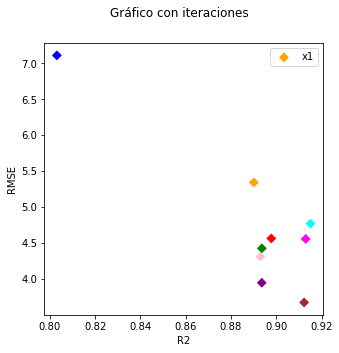

In [ ]:
# Graficar errores RMSE vs R2
colors_set = np.array(["orange","purple","brown","cyan","magenta","red","green","blue","pink"])
plt.figure(figsize=(5,5))
plt.suptitle('Gráfico con iteraciones')
plt.scatter(R2_all, RMSE_all, marker="D", label="error", c=colors_set)
plt.xlabel('R2')
plt.ylabel('RMSE')
# Add legend
plt.legend(["x1"], loc='best')
# Display
plt.show()